In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data   = pd.read_csv("Waterbase_v2018_1_WISE4_csv/Waterbase_v2018_1_T_WISE4_BiologyEQRData.csv") # Read Main CSV File
cri_RW = pd.read_csv("EQR_RW_Criteria.csv") # Read RW Criteria File
cri_LW = pd.read_csv("EQR_LW_Criteria.csv") # Read LW Criteria File

In [3]:
# Observe Info of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29741 entries, 0 to 29740
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   monitoringSiteIdentifier                   29741 non-null  object 
 1   monitoringSiteIdentifierScheme             29741 non-null  object 
 2   parameterWaterBodyCategory                 29741 non-null  object 
 3   parameterNCSWaterBodyType                  29680 non-null  object 
 4   observedPropertyDeterminandBiologyEQRCode  29741 non-null  object 
 5   phenomenonTimeReferenceYear                29741 non-null  int64  
 6   parameterSamplingPeriod                    27503 non-null  object 
 7   resultEcologicalStatusClassValue           29741 non-null  int64  
 8   resultNumberOfSamples                      29741 non-null  int64  
 9   resultEQRValue                             27425 non-null  float64
 10  resultNormalisedEQRVal

In [4]:
# Sample
data.sample(5)

,monitoringSiteIdentifier,monitoringSiteIdentifierScheme,parameterWaterBodyCategory,parameterNCSWaterBodyType,observedPropertyDeterminandBiologyEQRCode,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultEcologicalStatusClassValue,resultNumberOfSamples,resultEQRValue,resultNormalisedEQRValue,resultObservationStatus,Remarks,metadata_versionId,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID
2835,UK51895,eionetMonitoringSiteCode,RW,General,EEA_13-01-4,2009,2009-01--2009-12,3,2,0.770000,0.436364,NaN,ASPT,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,24357
7741,IT0801120200,euMonitoringSiteCode,RW,Mb,EEA_124-04-9,2012,2012-01--2012-12,3,2,0.670000,0.426667,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,23418
9334,FRDR06128620,euMonitoringSiteCode,RW,GM6/8,EEA_124-01-6,2010,2010-06--2010-08,2,1,0.835714,0.670000,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,4052
25940,HR29120,euMonitoringSiteCode,RW,HR-R_5B,EEA_13-04-7,2015,2015-01-01--2015-12-31,2,1,0.700000,0.700000,NaN,NaN,http://cdr.eionet.europa.eu/hr/eea/wise_soe/wi...,2019-01-25 09:25:43.000,valid,A,NaN,46787
4829,IT01022040,euMonitoringSiteCode,RW,R-C,EEA_124-01-6,2012,2012-01--2012-12,1,2,1.170000,1.000000,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,3053


In [5]:
# Check Result observation Status
data["resultObservationStatus"].value_counts()

A    7816
O     129
Name: resultObservationStatus, dtype: int64

In [6]:
# Null Value in result ObservationStatus
data["resultObservationStatus"].isnull().sum()

21796

In [7]:
# Remove the column that has missing observed value (The column that contained O)
data = data[data["resultObservationStatus"] != "O"]

In [8]:
# Check metadata observation Status
data["metadata_observationStatus"].value_counts()
# For the metadata_observation we can keep both because unvalidated data is labeled as V

A    26337
U     3275
Name: metadata_observationStatus, dtype: int64

In [9]:
# From The data definition file there are some ineteresting column that we could look into

# 1. monitoringSiteIdentifier                 (Unique international identifier of the monitoring site)
# 2. parameterWaterBodyCategory               (Water body category code)
# 3. parameterNCSWaterBodyType                (Type of water body as defined by the member state)
# 4. phenomenonTimeReferenceYear              (The reference Year of that data)
# 5. resultEcologicalStatusClassValue         (Categorical EQR Data)
# 6. resultEQRValue                           (Mean value of the biological metric converted to the national Ecological Quality Ratio (EQR) scale)
# 7. resultNormalisedEQRValue                 (Mean value of metric converted to normalised EQR scale (Ecological Quality Ratio))

MonitoringSiteIndentifer

In [10]:
# 1st Focusing on MonitoringSiteIndentifer Column
data["monitoringSiteIdentifier"].sample(5)

12142       ATFW73200617
18894     PL02S0502_2247
2724     UKEWMIBIOS50020
3236        FRGR04096360
25744          ES0911255
Name: monitoringSiteIdentifier, dtype: object

In [11]:
# Notice that the monitoringSiteIndetifer Column all begin with a CountryCode, Therefore we can extract the country code from each row. In order to have an easier time merging the dataset with the criteria

In [12]:
# Extracting Country code from this dataset
data["CountryCode"] = data["monitoringSiteIdentifier"].apply(lambda x: x[:2])

In [13]:
# Check Each Unique Country
data["CountryCode"].unique()

array(['NL', 'NO', 'ES', 'PL', 'PT', 'EE', 'RO', 'SE', 'BG', 'LU', 'SI',
       'SK', 'UK', 'BE', 'FR', 'FI', 'CY', 'IE', 'IT', 'LT', 'LV', 'DK',
       'HR', 'AT', 'CH', 'DE'], dtype=object)

In [14]:
# From the output it seems like there is more country in dataset compared to the criteria. Therefore, we will check the number of unique country in each dataset based on parameterWaterBodyCategory

parameterWaterBodyCategory

In [15]:
# Exploring parameterWaterBodyCategory Column
data["parameterWaterBodyCategory"].unique()

array(['RW', 'LW', 'TW', 'CW'], dtype=object)

In [16]:
data["parameterWaterBodyCategory"].value_counts()

RW    24738
LW     4852
TW       15
CW        7
Name: parameterWaterBodyCategory, dtype: int64

In [17]:
# The dataset contain 4 types of water
# 1. RW (River Water Body)
# 2. LW (Lake Water Body)
# 3. TW (Transitional Water Body)
# 4. CW (Coastal Water Body)

In [18]:
# We don't have the EQR citeria for both TW and CW types of water. So, we are planning to drop those row in the dataset.
# The data is only about 23 rows in 30k. Therefore, it likely to have to effect to our dataset.
# In addition, TW and CW are sea water which we don't drink it.
data = data[(data["parameterWaterBodyCategory"] == "RW") | (data["parameterWaterBodyCategory"] == "LW")]

In [19]:
# Check For Each Unique Country in Criteria Dataset
len_uni_EQR_RW = len(data[data["parameterWaterBodyCategory"] == "RW"]["CountryCode"].unique())
len_uni_EQR_LW = len(data[data["parameterWaterBodyCategory"] == "LW"]["CountryCode"].unique())
len_uni_RW     = len(cri_RW["CountryCode"].unique())
len_uni_LW     = len(cri_LW["CountryCode"].unique())

# Current File
print(f"Number of Unique Country in EQR (RW) Dataset : {len_uni_EQR_RW}")
print(f"Number of Unique Country in EQR (LW) Dataset : {len_uni_EQR_LW}")

# Another File
print(f"Number of Unique Country in RW Criteria      : {len_uni_RW}")
print(f"Number of Unique Country in LW Criteria      : {len_uni_LW}")

Number of Unique Country in EQR (RW) Dataset : 26
Number of Unique Country in EQR (LW) Dataset : 20
Number of Unique Country in RW Criteria      : 24
Number of Unique Country in LW Criteria      : 16


In [20]:
# From, the cell above now we are going to print the value that does not contained in the CountryCode
RW_does_not_contain = []
LW_does_not_contain = []

for RW in data[data["parameterWaterBodyCategory"] == "RW"]["CountryCode"].unique():
    if RW not in cri_RW["CountryCode"].unique():
        RW_does_not_contain.append(RW)

for LW in data[data["parameterWaterBodyCategory"] == "LW"]["CountryCode"].unique():
    if LW not in cri_LW["CountryCode"].unique():
        LW_does_not_contain.append(LW)

print(f"Countries that are not in the EQR (RW) Dataset : {RW_does_not_contain}")
print(f"Countries that are not in the EQR (LW) Dataset : {LW_does_not_contain}")

Countries that are not in the EQR (RW) Dataset : ['UK', 'DK', 'CH']
Countries that are not in the EQR (LW) Dataset : ['NO', 'UK', 'IT', 'DE', 'FR']


In [21]:
# Check the contry that are not in EQR Dataset

# Start with RW
data[(data["CountryCode"] == RW_does_not_contain[0]) | (data["CountryCode"] == RW_does_not_contain[1]) | (data["CountryCode"] == RW_does_not_contain[2])].sample(5)

,monitoringSiteIdentifier,monitoringSiteIdentifierScheme,parameterWaterBodyCategory,parameterNCSWaterBodyType,observedPropertyDeterminandBiologyEQRCode,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultEcologicalStatusClassValue,resultNumberOfSamples,resultEQRValue,resultNormalisedEQRValue,resultObservationStatus,Remarks,metadata_versionId,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID,CountryCode
8781,UKSC206807,euMonitoringSiteCode,RW,Mid-altitude Organic Medium,EEA_13-01-4,2015,2015-01-01--2015-12-21,2,1,0.600000,0.60000,A,NaN,http://cdr.eionet.europa.eu/gb/eea/wise_soe/wi...,2017-01-26 13:54:02.000,stable,A,NaN,39995,UK
1953,UKEWSWBIOS9656,euMonitoringSiteCode,RW,General,EEA_13-01-4,2010,2010-01--2010-12,1,2,0.979000,NaN,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,U,QC_LEGACY_EQR_MISS: Not available resultNormal...,10120,UK
10176,UKGBNIF10636,euMonitoringSiteCode,RW,F10636,EEA_13-01-4,2011,2011-01--2011-12,2,2,0.817534,0.75362,NaN,Invertebrate EQR is a single year assessment f...,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,12099,UK
3364,UKEWTHBIOS36072,euMonitoringSiteCode,RW,General,EEA_124-04-9,2009,2009-01--2009-12,3,2,0.596319,NaN,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,U,QC_LEGACY_182: resultNormalisedEQRValue cannot...,10475,UK
14359,UKSC122716,euMonitoringSiteCode,RW,Lowland Calcareous Small,EEA_13-01-4,2013,2013-01-01--2013-12-21,2,1,0.600000,0.60000,A,NaN,http://cdr.eionet.europa.eu/gb/eea/wise_soe/wi...,2016-04-28 16:16:02.000,stable,A,NaN,29443,UK


In [22]:
# Majority it is a EQR value from UK that does not have a criteria
data[(data["parameterWaterBodyCategory"] == "RW") & ((data["CountryCode"] == RW_does_not_contain[0]) | (data["CountryCode"] == RW_does_not_contain[1]) | (data["CountryCode"] == RW_does_not_contain[2]))].value_counts("CountryCode")

CountryCode
UK    6641
CH     217
DK     144
dtype: int64

In [23]:
# Categorize data into 2 datasets data_RW and data_LW
data_RW = data[data["parameterWaterBodyCategory"] == "RW"]
data_LW = data[data["parameterWaterBodyCategory"] == "LW"]

In [24]:
# Focusing on RW
data[(data["CountryCode"] == RW_does_not_contain[0]) | (data["CountryCode"] == RW_does_not_contain[1]) | (data["CountryCode"] == RW_does_not_contain[2])].sample(5)

,monitoringSiteIdentifier,monitoringSiteIdentifierScheme,parameterWaterBodyCategory,parameterNCSWaterBodyType,observedPropertyDeterminandBiologyEQRCode,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultEcologicalStatusClassValue,resultNumberOfSamples,resultEQRValue,resultNormalisedEQRValue,resultObservationStatus,Remarks,metadata_versionId,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID,CountryCode
12853,UKGBNIF10693,euMonitoringSiteCode,RW,Lowland Siliceous Small,EEA_13-01-4,2015,2015-01-01--2015-12-31,1,2,1.053000,NaN,A,NaN,http://cdr.eionet.europa.eu/gb/eea/wise_soe/wi...,2017-01-12 12:25:30.000,stable,A,NaN,39728,UK
9507,UKSC123151,euMonitoringSiteCode,RW,general,EEA_13-01-4,2010,2010-01--2010-12,1,1,1.080000,1.000000,NaN,ASPT,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,26938,UK
9776,UKEWMIBIOS52480,euMonitoringSiteCode,RW,General,EEA_13-01-4,2010,2010-01--2010-12,3,2,0.798000,NaN,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,U,QC_LEGACY_182: resultNormalisedEQRValue cannot...,9364,UK
11268,UKEWSWBIOS80816,euMonitoringSiteCode,RW,General,EEA_124-04-9,2011,2011-01--2011-12,3,2,0.584077,NaN,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,U,QC_LEGACY_182: resultNormalisedEQRValue cannot...,27114,UK
8714,UKSC008295,euMonitoringSiteCode,RW,general,EEA_124-04-9,2010,2010-01--2010-12,1,1,0.985000,0.957143,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,24628,UK


In [25]:
# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 1 in UK
first_boundary_UK = data_RW[(data_RW["CountryCode"] == "UK") & (data_RW["resultEcologicalStatusClassValue"] == 1)]["resultNormalisedEQRValue"].min()

# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 2 in UK
second_boundary_UK = data_RW[(data_RW["CountryCode"] == "UK") & (data_RW["resultEcologicalStatusClassValue"] == 2)]["resultNormalisedEQRValue"].min()

# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 3 in UK
third_boundary_UK = data_RW[(data_RW["CountryCode"] == "UK") & (data_RW["resultEcologicalStatusClassValue"] == 3)]["resultNormalisedEQRValue"].min()

# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 4 in UK
fourth_boundary_UK = data_RW[(data_RW["CountryCode"] == "UK") & (data_RW["resultEcologicalStatusClassValue"] == 4)]["resultNormalisedEQRValue"].min()

In [26]:
cri_RW = cri_RW.append({'CountryCode'                             :'UK',
                        'parameterICStatusOfDeterminandBiologyEQR':np.mean(cri_RW["parameterICStatusOfDeterminandBiologyEQR"]), 
                        'parameterBoundaryValueClasses12'         :first_boundary_UK,
                        'parameterBoundaryValueClasses23'         :second_boundary_UK,
                        'parameterBoundaryValueClasses34'         :third_boundary_UK,
                        'parameterBoundaryValueClasses45'         :fourth_boundary_UK}
                        , ignore_index=True)

In [27]:
# For the last 2 contries (CH and DK), it seem like there is no EQR value in the dataset. Therefore, we chose to drop all the data of these country from the dataset
print("Number of Non null resultEQR in CH Country code")
print(data_RW[data_RW["CountryCode"] == "CH"]["resultNormalisedEQRValue"].notnull().sum())
data_RW = data_RW[(data_RW["CountryCode"] != "CH")]

print("Number of Non null resultEQR in DK Country code")
print(data_RW[data_RW["CountryCode"] == "DK"]["resultNormalisedEQRValue"].notnull().sum())
data_RW = data_RW[(data_RW["CountryCode"] != "DK")]

data_RW.shape

Number of Non null resultEQR in CH Country code
0
Number of Non null resultEQR in DK Country code
0


(24377, 20)

In [28]:
data.parameterWaterBodyCategory.unique()

array(['RW', 'LW'], dtype=object)

In [29]:
# Focusing on LW
data[(data["parameterWaterBodyCategory"] == "LW") & ((data["CountryCode"] == LW_does_not_contain[0]) | (data["CountryCode"] == LW_does_not_contain[1]) | (data["CountryCode"] == LW_does_not_contain[2])| (data["CountryCode"] == LW_does_not_contain[3]) | (data["CountryCode"] == LW_does_not_contain[4]))].value_counts("CountryCode")

CountryCode
UK    650
DE    142
IT     46
NO     23
FR      8
dtype: int64

In [30]:
# For the Every country except UK we have only few non-null value, so we decided to drop them.
print("Number of Non null resultEQR in UK Country code")
print(data_LW[data_LW["CountryCode"] == "UK"]["resultNormalisedEQRValue"].notnull().sum())

print("Number of Non null resultEQR in DE Country code")
print(data_LW[data_LW["CountryCode"] == "DE"]["resultNormalisedEQRValue"].notnull().sum())
data_LW = data_LW[(data_LW["CountryCode"] != "DE")]

print("Number of Non null resultEQR in IT Country code")
print(data_LW[data_LW["CountryCode"] == "IT"]["resultNormalisedEQRValue"].notnull().sum())
data_LW = data_LW[(data_LW["CountryCode"] != "IT")]

print("Number of Non null resultEQR in NO Country code")
print(data_LW[data_LW["CountryCode"] == "NO"]["resultNormalisedEQRValue"].notnull().sum())
data_LW = data_LW[(data_LW["CountryCode"] != "NO")]

print("Number of Non null resultEQR in FR Country code")
print(data_LW[data_LW["CountryCode"] == "FR"]["resultNormalisedEQRValue"].notnull().sum())
data_LW = data_LW[(data_LW["CountryCode"] != "FR")]

data.shape

Number of Non null resultEQR in UK Country code
377
Number of Non null resultEQR in DE Country code
0
Number of Non null resultEQR in IT Country code
6
Number of Non null resultEQR in NO Country code
15
Number of Non null resultEQR in FR Country code
8


(29590, 20)

In [31]:
# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 1 in UK
first_boundary_UK  = data_LW[(data_LW["CountryCode"] == "UK") & (data_LW["resultEcologicalStatusClassValue"] == 1)]["resultNormalisedEQRValue"].min()

# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 2 in UK
second_boundary_UK = data_LW[(data_LW["CountryCode"] == "UK") & (data_LW["resultEcologicalStatusClassValue"] == 2)]["resultNormalisedEQRValue"].min()

# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 3 in UK
third_boundary_UK  = data_LW[(data_LW["CountryCode"] == "UK") & (data_LW["resultEcologicalStatusClassValue"] == 3)]["resultNormalisedEQRValue"].min()

# Check for the lower resultEQR that have resultEcologicalStatusClassValue equal to 4 in UK
fourth_boundary_UK = data_LW[(data_LW["CountryCode"] == "UK") & (data_LW["resultEcologicalStatusClassValue"] == 4)]["resultNormalisedEQRValue"].min()

In [32]:
cri_LW = cri_LW.append({'CountryCode'                             :'UK',
                        'parameterICStatusOfDeterminandBiologyEQR':np.mean(cri_RW["parameterICStatusOfDeterminandBiologyEQR"]), 
                        'parameterBoundaryValueClasses12'         :first_boundary_UK,
                        'parameterBoundaryValueClasses23'         :second_boundary_UK,
                        'parameterBoundaryValueClasses34'         :third_boundary_UK,
                        'parameterBoundaryValueClasses45'         :fourth_boundary_UK}
                        , ignore_index=True)

In [33]:
# Concat LW dataset and RW dataset
data = pd.concat([data_RW, data_LW])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29010 entries, 0 to 29709
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   monitoringSiteIdentifier                   29010 non-null  object 
 1   monitoringSiteIdentifierScheme             29010 non-null  object 
 2   parameterWaterBodyCategory                 29010 non-null  object 
 3   parameterNCSWaterBodyType                  29006 non-null  object 
 4   observedPropertyDeterminandBiologyEQRCode  29010 non-null  object 
 5   phenomenonTimeReferenceYear                29010 non-null  int64  
 6   parameterSamplingPeriod                    27081 non-null  object 
 7   resultEcologicalStatusClassValue           29010 non-null  int64  
 8   resultNumberOfSamples                      29010 non-null  int64  
 9   resultEQRValue                             27195 non-null  float64
 10  resultNormalisedEQRVal

parameterNCSWaterBodyType

In [35]:
# Check Parameter in this column
data["parameterNCSWaterBodyType"].value_counts()

General           4043
1                  967
17                 936
general            775
2                  600
                  ... 
Rh                   1
REL1313              1
 ROLNCAPMLA 02       1
RO01aCAPM            1
REL1223              1
Name: parameterNCSWaterBodyType, Length: 986, dtype: int64

In [36]:
# Fix the capital general value
data["parameterNCSWaterBodyType"].replace("General","general",inplace=True)

In [37]:
# Fill the missing value with mode
missing_val = data["parameterNCSWaterBodyType"].isna().sum()
print(f"Total Missing Value : {missing_val}")
data["parameterNCSWaterBodyType"].fillna("general",inplace=True)

Total Missing Value : 4


In [38]:
# Using Ordinal Encoder to dummies the value
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain

encoder = OrdinalEncoder()
data[["parameterNCSWaterBodyType"]] = encoder.fit_transform(data[["parameterNCSWaterBodyType"]])

In [39]:
encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

In [40]:
encoder_data_set.head()

,Number,Data
0,0,ROLNCAPMLA 02
1,1,0
2,2,01GH1N
3,3,01GH2N
4,4,01GH4N


In [41]:
encoder_data_set.to_csv("ENCODER_paramterNCS.csv",index=False)

phenomenonTimeReferenceYear

In [42]:
# Explore the column
data.value_counts("phenomenonTimeReferenceYear")

phenomenonTimeReferenceYear
2010    5387
2011    5187
2014    4125
2012    3415
2013    3090
2015    2983
2016    1264
2017    1020
2009     930
2008     705
2007     432
2006     178
2005     144
2004     137
2003       4
1994       1
2002       1
2001       1
2000       1
1999       1
1998       1
1996       1
1995       1
1992       1
dtype: int64

resultEcologicalStatusClassValue

In [43]:
# Config the 345 value in result Ecological Status to make it easier to understand

data.replace(345,6,inplace=True)

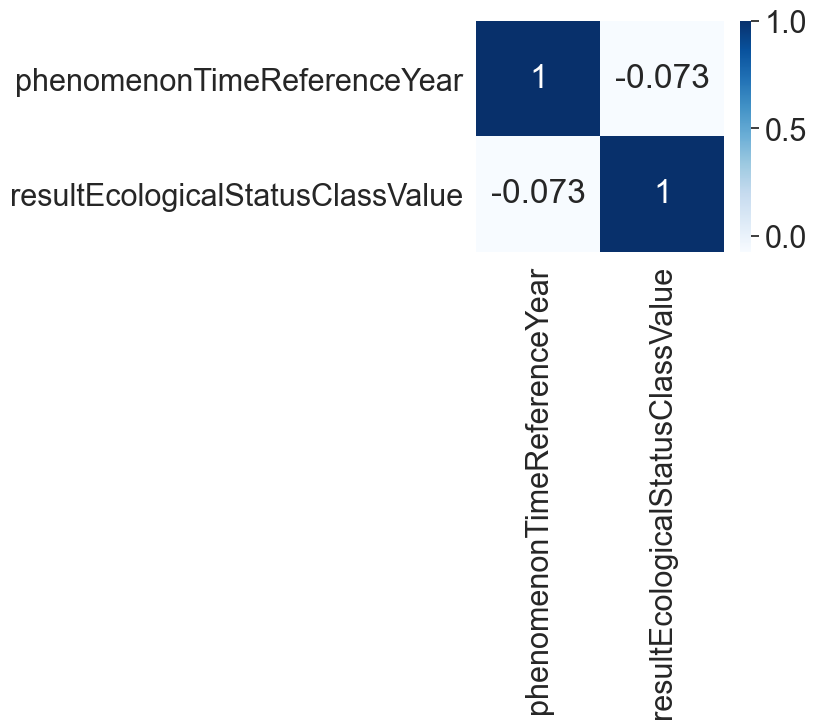

In [44]:
# Plot the Time Reference Year vs EQR graph              
sns.set(font_scale=2)                               # Set Font size 
plt.figure(figsize=(4,3))                           # Set Figure size
sns.heatmap(data[["phenomenonTimeReferenceYear","resultEcologicalStatusClassValue"]].corr(),annot=True, cmap="Blues") # Heatmap
plt.show()

In [45]:
# The Graph shows that as the year go on the EQR of water decrease

In [46]:
# Convert EQR value from 5 categorical to 2 because we just want to know if the water is good or bad
# Set the value as Good as 1 , Bad as 0
data['result_convert_EQR'] = np.where(data['resultEcologicalStatusClassValue'] > 2, 0, 1)

Merging Data

In [47]:
# Categorize data into 2 datasets data_RW and data_LW
data_RW = data[data["parameterWaterBodyCategory"] == "RW"]
data_LW = data[data["parameterWaterBodyCategory"] == "LW"]

In [48]:
# Merging Data
inner_merged_RW = pd.merge(cri_RW,data_RW,on="CountryCode") # Merge cri_RW with data_RW
print(f"RW shape : {inner_merged_RW.shape}")                # Check the shape of new Data
inner_merged_LW = pd.merge(cri_LW,data_LW,on="CountryCode") # Merge cri_LW with data_LW
print(f"LW shape : {inner_merged_LW.shape}")                # Check the shape of new Data

RW shape : (24377, 26)
LW shape : (4633, 26)


In [49]:
# Concat both data and check the shape
concatenated = pd.concat([inner_merged_RW, inner_merged_LW])
print(f"New Data Shape : {concatenated.shape}")     

New Data Shape : (29010, 26)


In [50]:
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29010 entries, 0 to 4632
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CountryCode                                29010 non-null  object 
 1   parameterICStatusOfDeterminandBiologyEQR   29010 non-null  float64
 2   parameterBoundaryValueClasses12            29010 non-null  float64
 3   parameterBoundaryValueClasses23            29010 non-null  float64
 4   parameterBoundaryValueClasses34            29010 non-null  float64
 5   parameterBoundaryValueClasses45            29010 non-null  float64
 6   monitoringSiteIdentifier                   29010 non-null  object 
 7   monitoringSiteIdentifierScheme             29010 non-null  object 
 8   parameterWaterBodyCategory                 29010 non-null  object 
 9   parameterNCSWaterBodyType                  29010 non-null  float64
 10  observedPropertyDetermi

In [51]:
# For the ResultEQR we will need more data from aggregated data to fill the missing values

# Select the Feature that we want to export
cols = ["CountryCode",
         "parameterICStatusOfDeterminandBiologyEQR",
         "parameterBoundaryValueClasses12",
         "parameterBoundaryValueClasses23",
         "parameterBoundaryValueClasses34",
         "parameterBoundaryValueClasses45",
         "monitoringSiteIdentifier",
         "parameterWaterBodyCategory",
         "parameterNCSWaterBodyType",
         "resultEcologicalStatusClassValue",
         "result_convert_EQR",
         "UID"
        ]

# Select the column
concatenated = concatenated[cols]

In [52]:
concatenated

,CountryCode,parameterICStatusOfDeterminandBiologyEQR,parameterBoundaryValueClasses12,parameterBoundaryValueClasses23,parameterBoundaryValueClasses34,parameterBoundaryValueClasses45,monitoringSiteIdentifier,parameterWaterBodyCategory,parameterNCSWaterBodyType,resultEcologicalStatusClassValue,result_convert_EQR,UID
0,AT,0.000000,0.817097,0.600968,0.418710,0.237742,ATFW10000177,RW,280.0,2,1,23000
1,AT,0.000000,0.817097,0.600968,0.418710,0.237742,ATFW21500306,RW,120.0,2,1,23001
2,AT,0.000000,0.817097,0.600968,0.418710,0.237742,ATFW21531167,RW,916.0,3,0,23002
3,AT,0.000000,0.817097,0.600968,0.418710,0.237742,ATFW21551267,RW,389.0,2,1,23003
4,AT,0.000000,0.817097,0.600968,0.418710,0.237742,ATFW21560297,RW,389.0,1,1,23004
...,...,...,...,...,...,...,...,...,...,...,...,...
4628,UK,0.557596,0.800000,0.600000,0.244444,0.223339,UKSC202906,LW,444.0,2,1,44982
4629,UK,0.557596,0.800000,0.600000,0.244444,0.223339,UKSC203476,LW,445.0,1,1,44983
4630,UK,0.557596,0.800000,0.600000,0.244444,0.223339,UKSC203476,LW,445.0,2,1,44984
4631,UK,0.557596,0.800000,0.600000,0.244444,0.223339,UKSC203978,LW,449.0,1,1,44985


In [53]:
concatenated.to_csv("Cleaned_EQR.csv",index=False)